# 1.Import Needed Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px  

from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 

from sklearn.metrics import r2_score, mean_squared_error

# 2.Analysis

In [2]:
holidays=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv",parse_dates=["date"])
oil=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/oil.csv",parse_dates=["date"])
stores=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/stores.csv")
train=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv",parse_dates=["date"])
transactions=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/transactions.csv",parse_dates=["date"])

df=pd.merge(train, stores, on="store_nbr", how="left")
df=pd.merge(df, transactions, on=["store_nbr","date"], how="left")
df=pd.merge(df, oil, on="date", how="left")
df=pd.merge(df, holidays, on="date", how="left")

In [3]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [4]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [5]:
df.tail()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico,type_y,locale,locale_name,description,transferred
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,Quito,Pichincha,B,6,2155.0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [6]:
df.shape

(3054348, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   city          object        
 7   state         object        
 8   type_x        object        
 9   cluster       int64         
 10  transactions  float64       
 11  dcoilwtico    float64       
 12  type_y        object        
 13  locale        object        
 14  locale_name   object        
 15  description   object        
 16  transferred   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(9)
memory usage: 396.1+ MB


In [8]:
df.describe()

,id,date,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico
count,3.054348e+06,3054348,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,2.805231e+06,2.099196e+06
mean,1.504277e+06,2015-04-26 12:11:45.717619456,2.750000e+01,3.590209e+02,2.617480e+00,8.481481e+00,1.697071e+03,6.801587e+01
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,2.619000e+01
25%,7.546768e+05,2014-03-01 00:00:00,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00,1.046000e+03,4.641000e+01
50%,1.507572e+06,2015-04-28 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00,8.500000e+00,1.395000e+03,5.343000e+01
75%,2.255120e+06,2016-06-22 00:00:00,4.100000e+01,1.960110e+02,0.000000e+00,1.300000e+01,2.081000e+03,9.581000e+01
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01,8.359000e+03,1.106200e+02
std,8.662610e+05,NaN,1.558579e+01,1.107286e+03,1.225494e+01,4.649735e+00,9.668317e+02,2.569134e+01


In [9]:
df.describe(include="O")

,family,city,state,type_x,type_y,locale,locale_name,description,transferred
count,3054348,3054348,3054348,3054348,502524,502524,502524,502524,502524
unique,33,22,16,5,6,3,24,101,2
top,AUTOMOTIVE,Quito,Pichincha,D,Holiday,National,Ecuador,Carnaval,False
freq,92556,1018116,1074678,1018116,304722,261954,261954,17820,486486


In [10]:
df.sample(3)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico,type_y,locale,locale_name,description,transferred
819324,810414,2014-04-01,48,AUTOMOTIVE,9.00000,0,Quito,Pichincha,A,14,3143.0,99.69,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2205479,2173721,2016-05-07,5,FROZEN FOODS,226.38400,1,Santo Domingo,Santo Domingo de los Tsachilas,D,4,1646.0,NaN,Event,National,Ecuador,Terremoto Manabi+21,False
42000,42000,2013-01-24,37,MEATS,188.45801,0,Cuenca,Azuay,D,2,1245.0,95.35,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type_x                0
cluster               0
transactions     249117
dcoilwtico       955152
type_y          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dtype: int64

# 3.Preprocessing

# 3.1.Handling Missing Values

In [12]:
df.drop(columns=["type_y","locale","locale_name","description","transferred","id"],inplace=True)

In [13]:
df["transactions"] = df["transactions"].fillna(0)
df["dcoilwtico"] = df["dcoilwtico"].fillna(method="ffill")

/tmp/ipykernel_13/876963766.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["dcoilwtico"] = df["dcoilwtico"].fillna(method="ffill")


In [14]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico
0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,0.0,NaN
1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,0.0,NaN
2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,0.0,NaN
3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,0.0,NaN
4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,2155.0,47.57
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,2155.0,47.57
3054345,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,2155.0,47.57
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,2155.0,47.57


In [15]:
df.isnull().sum()

date               0
store_nbr          0
family             0
sales              0
onpromotion        0
city               0
state              0
type_x             0
cluster            0
transactions       0
dcoilwtico      1782
dtype: int64

In [16]:
for col in df.select_dtypes(include=np.number).columns: # for numrical columns
    df[col]=df[col].fillna(method="bfill")

/tmp/ipykernel_13/1141258416.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col]=df[col].fillna(method="bfill")


In [17]:
df.isnull().sum()

date            0
store_nbr       0
family          0
sales           0
onpromotion     0
city            0
state           0
type_x          0
cluster         0
transactions    0
dcoilwtico      0
dtype: int64

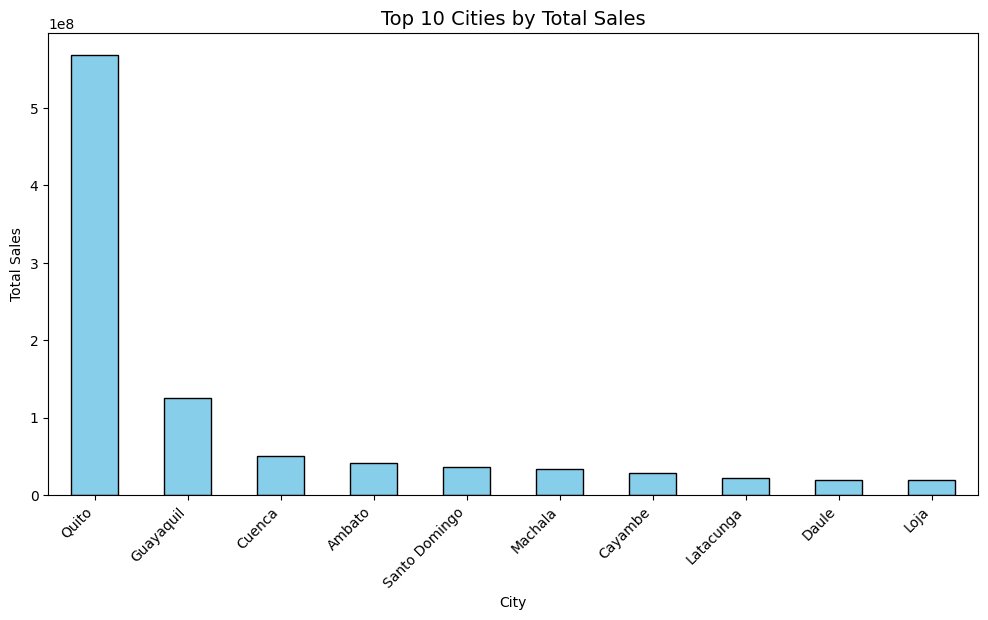

In [18]:
city_sales = df.groupby("city")["sales"].sum().sort_values(ascending=False)

top_cities = city_sales.head(10)

plt.figure(figsize=(12,6))
top_cities.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 10 Cities by Total Sales", fontsize=14)
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha="right")
plt.show()

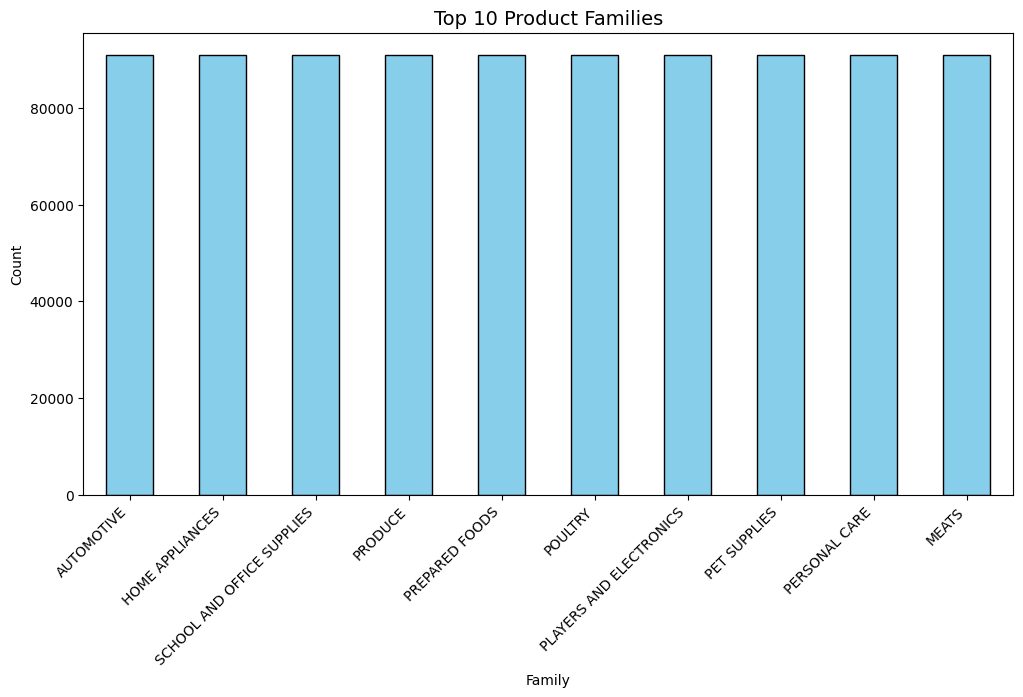

In [19]:
family_counts = train["family"].value_counts().head(10)  # نجيب Top 10 بس

plt.figure(figsize=(12,6))
family_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Top 10 Product Families", fontsize=14)
plt.xlabel("Family")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()


# 3.2.Handling Outliers(IQR)

In [20]:
def remove_outlier_IQR(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5 * IQR
    upper=Q3+1.5 * IQR
    return df[(df[column]>=lower)&(df[column]<=upper)]
for col in df.select_dtypes(include=np.number).columns:
    df = remove_outlier_IQR(df, col) 

In [21]:
df.shape

(2123697, 11)

# 4.Feature Engineering

In [22]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["dayofweek"] = df["date"].dt.dayofweek
df["is_weekend"] = df["dayofweek"].isin([5,6]).astype(int) 
df["quarter"] = df["date"].dt.quarter

In [23]:
df

,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico,year,month,day,dayofweek,is_weekend,quarter
0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,0.0,93.14,2013,1,1,1,0,1
1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,0.0,93.14,2013,1,1,1,0,1
2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,0.0,93.14,2013,1,1,1,0,1
3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,0.0,93.14,2013,1,1,1,0,1
4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,0.0,93.14,2013,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054339,2017-08-15,9,MEATS,449.228,0,Quito,Pichincha,B,6,2155.0,47.57,2017,8,15,1,0,3
3054341,2017-08-15,9,PET SUPPLIES,6.000,0,Quito,Pichincha,B,6,2155.0,47.57,2017,8,15,1,0,3
3054342,2017-08-15,9,PLAYERS AND ELECTRONICS,6.000,0,Quito,Pichincha,B,6,2155.0,47.57,2017,8,15,1,0,3
3054343,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,2155.0,47.57,2017,8,15,1,0,3


# 5.Feature Selection

In [24]:
x=df.drop(columns=["sales","date"])
y=df["sales"]

# 6.Encoding and Scaling

In [25]:
numeric_features = ["year", "month", "day", "dayofweek", "is_weekend", "quarter", "dcoilwtico", "transactions", "cluster", "onpromotion"]
categorical_features = ["family", "city", "state", "type_x", "store_nbr"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

# 7.TrainTestSplit

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 8.LinearRegressionPipeline

In [27]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'month', 'day',
                                                   'dayofweek', 'is_weekend',
                                                   'quarter', 'dcoilwtico',
                                                   'transactions', 'cluster',
                                                   'onpromotion']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['family', 'city', 'state',
                                                   'type_x', 'store_nbr'])])),
                ('regressor', LinearRegression())])

# 9.Evaluation

In [28]:
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 59.08115246479384
R² Score: 0.564012465691607


In [29]:
import joblib

joblib.dump(model, "Store_Sales_lR_pipeline.pkl")

print("Pipeline saved successfully!")

loaded_model = joblib.load("Store_Sales_lR_pipeline.pkl")

sample_pred = loaded_model.predict(x_test[:5])
print("Sample Predictions:", sample_pred)

Pipeline saved successfully!
Sample Predictions: [-11.20065873 -10.40400964  36.66582804 -54.13192252  35.45228476]


# ARIMA


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA RMSE: 186871.6949019102


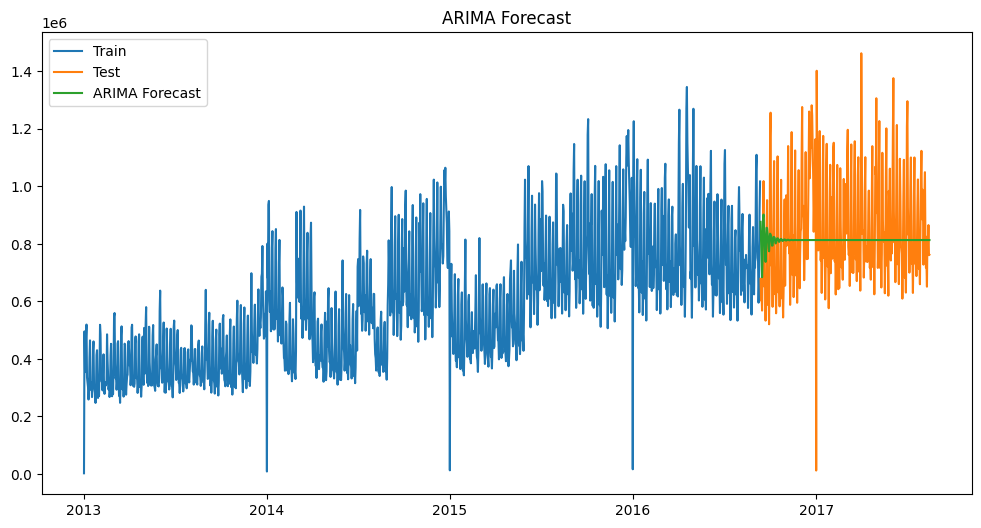

In [30]:
import statsmodels.api as sm

# aggregate daily sales for all stores/items
daily_sales = train.groupby("date")["sales"].sum()

# split train-test
train_size = int(len(daily_sales) * 0.8)
train_arima, test_arima = daily_sales[:train_size], daily_sales[train_size:]

# fit ARIMA
model_arima = sm.tsa.ARIMA(train_arima, order=(5,1,0))  # (p,d,q)
results_arima = model_arima.fit()

# forecast
forecast_arima = results_arima.forecast(steps=len(test_arima))

# evaluate
rmse_arima = np.sqrt(mean_squared_error(test_arima, forecast_arima))
print("ARIMA RMSE:", rmse_arima)

# plot
plt.figure(figsize=(12,6))
plt.plot(train_arima.index, train_arima, label="Train")
plt.plot(test_arima.index, test_arima, label="Test")
plt.plot(test_arima.index, forecast_arima, label="ARIMA Forecast")
plt.legend()
plt.title("ARIMA Forecast")
plt.show()


# SARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


SARIMA RMSE: 262565.6130707469


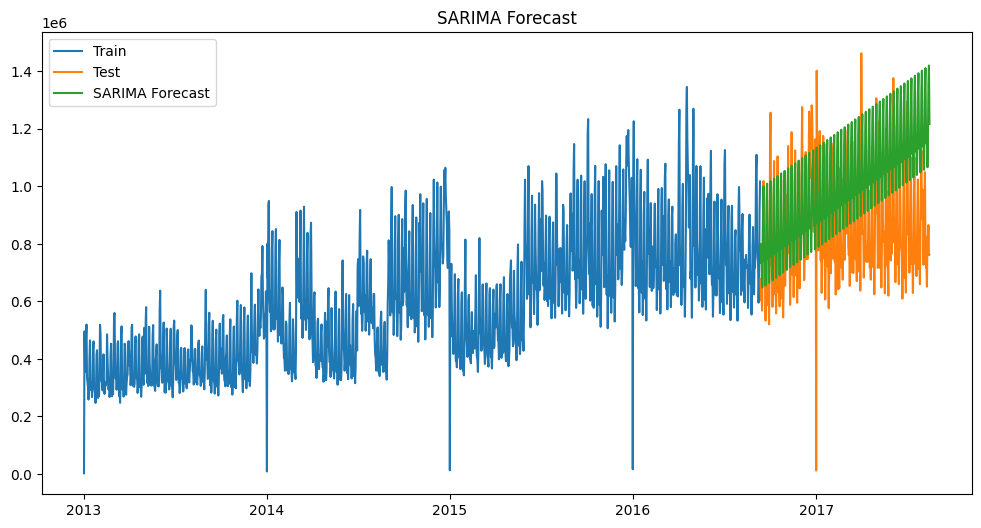

In [31]:
# SARIMA with seasonality (example: weekly seasonality = 7)
sarima_model = sm.tsa.statespace.SARIMAX(train_arima, 
                                         order=(2,1,2), 
                                         seasonal_order=(1,1,1,7))
sarima_results = sarima_model.fit()

sarima_forecast = sarima_results.forecast(steps=len(test_arima))

rmse_sarima = np.sqrt(mean_squared_error(test_arima, sarima_forecast))
print("SARIMA RMSE:", rmse_sarima)

plt.figure(figsize=(12,6))
plt.plot(train_arima.index, train_arima, label="Train")
plt.plot(test_arima.index, test_arima, label="Test")
plt.plot(test_arima.index, sarima_forecast, label="SARIMA Forecast")
plt.legend()
plt.title("SARIMA Forecast")
plt.show()


# PROPHET

06:18:23 - cmdstanpy - INFO - Chain [1] start processing
06:18:23 - cmdstanpy - INFO - Chain [1] done processing


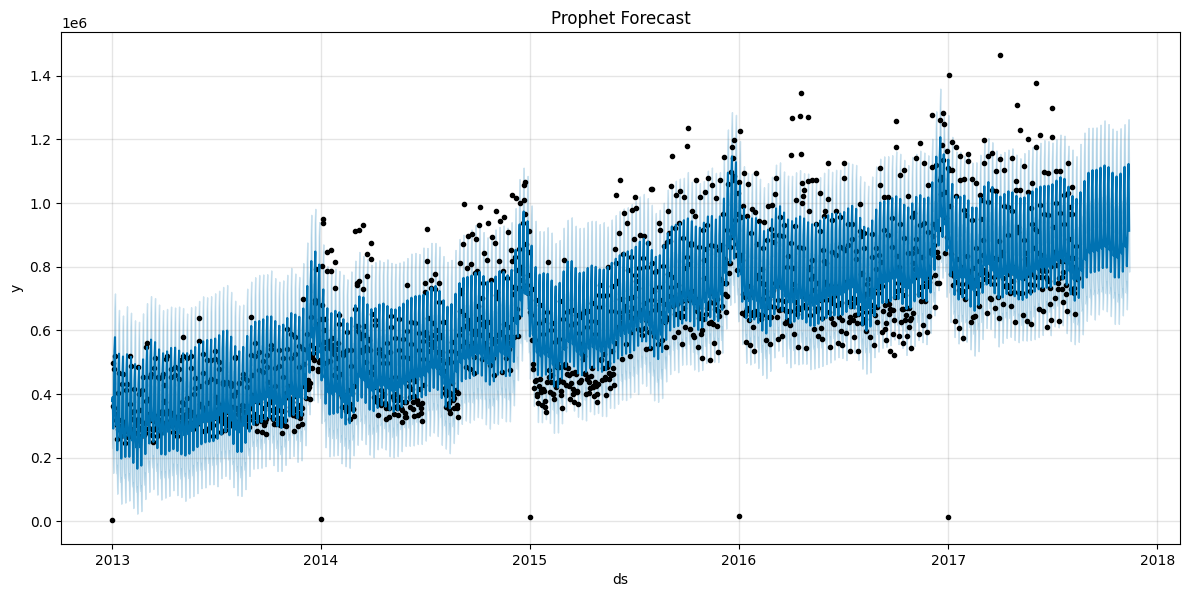

Prophet RMSE: 189215.4031747727


In [32]:
from prophet import Prophet

# prepare data for Prophet
df_prophet = daily_sales.reset_index()
df_prophet.columns = ["ds", "y"]

# fit Prophet
model_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model_prophet.fit(df_prophet)

# make future dataframe
future = model_prophet.make_future_dataframe(periods=90)  # forecast 90 days
forecast = model_prophet.predict(future)

# plot forecast
fig = model_prophet.plot(forecast, figsize=(12,6))
plt.title("Prophet Forecast")
plt.show()

# evaluate Prophet on last N days
test_len = len(test_arima)
prophet_pred = forecast.iloc[-test_len:]["yhat"].values
rmse_prophet = np.sqrt(mean_squared_error(test_arima, prophet_pred))
print("Prophet RMSE:", rmse_prophet)
